<a href="https://colab.research.google.com/github/Benkaperday/cs130-intro/blob/main/Another_copy_of_Curve_fitting_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 (Make your own copy of this file)
## Curve fitting: Path of a cannonball
---
First, turn off AI by clicking the gear in the upper right and selecting 'AI assistance.'  Make sure that 'consent to use generative AI features' is turned off. This will make sure that you are using the correct methods of solution and that you are getting the practice you need to be successful on exams.

Start by collecting data from here:
https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_all.html
For each point, record the time, height, and range in a csv file in Excel or your preferred spreadsheet program. Save your work as cannon.csv

In [15]:
# Run this first.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from sklearn.model_selection import train_test_split


We will start by defining our models. I suggest that you have your 'Intro to line fitting' colab document open for reference.

- complete the definition of a linear model. It should have both a slope and a y-intercept.

- write a second function called quadratic(x, a, b, c) that returns a quadratic function of the form $ax^2 + bx + c$.  Hint: to raise a number to a power in python, use asterisks:    x**2.

In [16]:
def linear(x, m, b):
    return m*x + b
def quadratic(x, a, b, c):
    return a*(x**2) + b*x + c

Obtain the data by uploading your .csv file into the folder at left. Use the upload button to find the right document.Then run the following code.

In [17]:
data = np.loadtxt("cannon.csv", delimiter=",", dtype=str)
display(data)

array([['\ufefftime', 'range ', 'height'],
       ['0.3', '0.94', '4.88'],
       ['0.5', '1.56', '7.64'],
       ['0.7', '2.19', '10.01'],
       ['0.9', '2.81', '11.98'],
       ['1.1', '3.44', '13.56'],
       ['1.81', '5.65', '16.02'],
       ['2.1', '6.56', '15.59'],
       ['2.3', '7.19', '14.82'],
       ['2.5', '7.81', '13.66'],
       ['2.9', '9.06', '10.16'],
       ['3.1', '9.69', '7.82']], dtype='<U6')

Create 3 arrays based on this data called t, x, and h. Each will only be one-dimensional, like a list. The array called t should store only the time values in the data, and it should not include the text. I suggest that you define it using array slicing - start at the first actual number (row 1, column 0) and slice the array so that you are keeping only column 0. After slicing, convert the array to be floats instead of strings using .astype(np.float32).

Similarly, for x, slice the array to keep only column 1. Again, don't include element 0 since that is text, not a number.

For h, slice the array to keep only column 2, and exclude element 0.

In [18]:
t = data[1:, 0].astype(np.float32) # I did this one for you.
x = data[1:, 1].astype(np.float32)
h = data[1:, 2].astype(np.float32)

With the code below, check that you have included only numbers, not the text at the top of each column.

In [19]:
print("t = ", t)
print("x = ", x)
print("h = ", h)

t =  [0.3  0.5  0.7  0.9  1.1  1.81 2.1  2.3  2.5  2.9  3.1 ]
x =  [0.94 1.56 2.19 2.81 3.44 5.65 6.56 7.19 7.81 9.06 9.69]
h =  [ 4.88  7.64 10.01 11.98 13.56 16.02 15.59 14.82 13.66 10.16  7.82]


## Fitting

Check the scatterplot:


Text(0, 0.5, 'x (meters)')

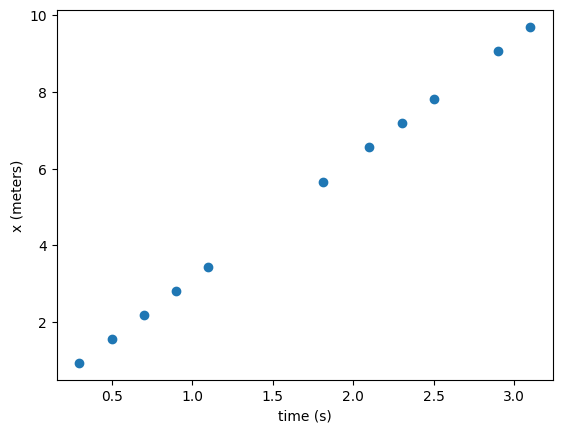

In [20]:
plt.figure()
plt.scatter(t, x)
plt.xlabel("time (s)")
plt.ylabel("x (meters)")

Let's see how we could fit it to a line and extract the best fit parameters.  For fitting in this class, we will start with the "optimize" method from the scipy.

In [21]:
params, params_covariance = scipy.optimize.curve_fit(linear, t, x)
slope = params[0]
intercept = params[1]

print('x = {:.3f} t + {:.3f}'.format(slope,intercept)) #equation for a line is y = m x + b


x = 3.125 t + 0.000


We got the best-fit parameters and put them into the equation for a line.  Let's plot the resulting best fit line on the data and see how it looks.

Text(0, 0.5, 'distance in x direction')

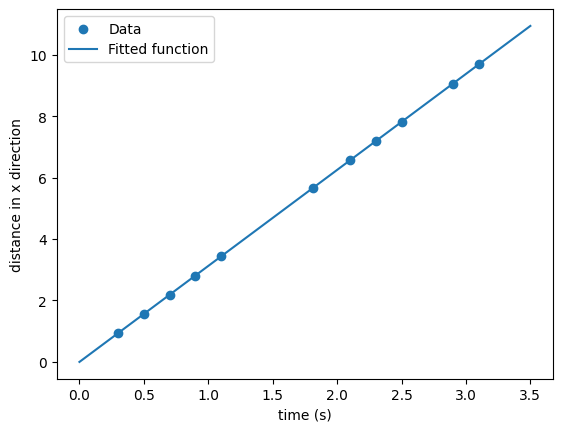

In [22]:
plt.figure()
plt.scatter(t, x, label='Data')
t2 = np.linspace(0, 3.5, 100) #want more points - this gives us 100 points
plt.plot(t2, linear(t2, slope, intercept),label='Fitted function')
plt.legend(loc='best')
plt.xlabel("time (s)")
plt.ylabel("distance in x direction")

## EXERCISE:  
In the space below, use the quadratic function that you already defined to fit time and height (instead of range). There will be 3 parameters that come out: a, b, and c. Print out the equation of the curve using .format() as in the sample code provided above. The output should have this form (your numbers will differ):  

h = -4.911 t^2 + 17.734 t + 0.001

In [23]:
params, params_covariance = scipy.optimize.curve_fit(quadratic, t, h)
a = params[0]
b = params[1]
c = params[2]

print('h = {:.3f} t^2 + {:.3f}t + {:.3f} '.format(a, b, c,))#your code here

h = -4.902 t^2 + 17.715t + 0.008 


Now plot the fitted curve. You'll need to change the code to use the quadratic function and graph height vs. time instead of x versus time.

Text(0, 0.5, 'distance in x direction')

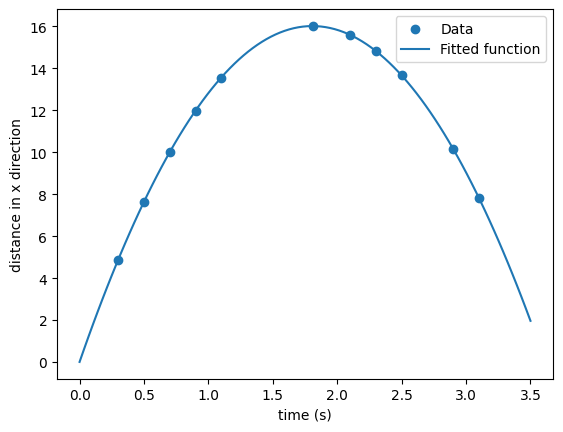

In [24]:
#TODO: modify this code to be appropriate for a quadratic fit.
plt.figure()
plt.scatter(t,h, label='Data')   #change this
t2 = np.linspace(0, 3.5, 100)
plt.plot(t2, quadratic(t2, a,b,c),label='Fitted function') #change this
plt.legend(loc='best')
plt.xlabel("time (s)")
plt.ylabel("distance in x direction") #change this

## EXERCISE 2:  
Go back to the phet simulation, and instead of a cannonball, use the piano option. Turn on 'air resistance.' This should produce a note that says "Drag Coefficient: 1.20." This indicates that a piano experiences a lot of 'drag' from air resistance as it flies through the air. I expect that this will change the shape of its path, and therefore the quadratic fit won't be quite as perfect as before.
Repeat the data collection. This time, use piano as your filename and make sure it saves as a csv file again. Without overwriting any of your previous work, redo your analysis with both the x and h fits. Put your code below.

This time, rename your t, x, and h variables to be called t_p, x_p, and h_p.  Rename your fit parameters similarly. For example, instead of slope, use slope_p. Instead of b, use b_p.

In [25]:
data = np.loadtxt("piano.csv", delimiter=",", dtype=str)
display(data)

array([['\ufefftime', 'range', 'height'],
       ['0.3', '0.92', '4.79'],
       ['0.5', '1.52', '7.41'],
       ['0.7', '2.11', '9.6'],
       ['0.9', '2.69', '11.36'],
       ['1.68', '4.9', '14.38'],
       ['2.2', '6.34', '13.07'],
       ['2.4', '6.89', '11.86'],
       ['2.6', '7.43', '10.28'],
       ['2.8', '7.97', '8.33'],
       ['3.1', '8.76', '4.74']], dtype='<U6')

In [26]:
t_p = data[1:, 0].astype(np.float32)
x_p = data[1:, 1].astype(np.float32)
h_p = data[1:, 2].astype(np.float32)

In [27]:
print("t_p = ", t_p)
print("x_p = ", x_p)
print("h_p = ", h_p)

t_p =  [0.3  0.5  0.7  0.9  1.68 2.2  2.4  2.6  2.8  3.1 ]
x_p =  [0.92 1.52 2.11 2.69 4.9  6.34 6.89 7.43 7.97 8.76]
h_p =  [ 4.79  7.41  9.6  11.36 14.38 13.07 11.86 10.28  8.33  4.74]


In [28]:
params, params_covariance = scipy.optimize.curve_fit(quadratic, t_p, h_p)
a_p = params[0]
b_p = params[1]
c_p = params[2]

print('h = {:.3f} t^2 + {:.3f}t + {:.3f} '.format(a_p, b_p, c_p,))

h = -4.894 t^2 + 16.562t + 0.348 


Text(0, 0.5, 'distance in x direction')

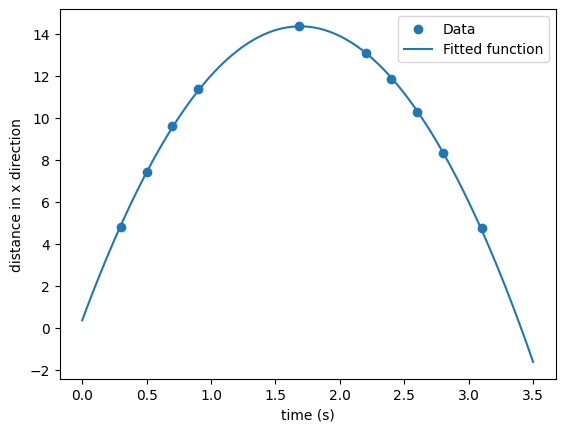

In [29]:
#TODO: modify this code to be appropriate for a quadratic fit.
plt.figure()
plt.scatter(t_p,h_p, label='Data')   #change this
t2 = np.linspace(0, 3.5, 100)
plt.plot(t2, quadratic(t2, a_p,b_p,c_p),label='Fitted function') #change this
plt.legend(loc='best')
plt.xlabel("time (s)")
plt.ylabel("distance in x direction") #change this

After completing your analysis, please comment on how well the quadratic shape fits the height data, and how well the linear fit matches the x data.

## EXERCISE 3:  Error analysis

Write a function called error() that takes in two lists of data, called fitted_x and actual_x, and calculates the error between the fitted values and actual values. This function will need to do the following things, in order:

- subtract actual_x from fitted_x
- square the result of the previous step. Remember to use double asterisks. The purpose of squaring is to remove any negatives from the subtraction.
- take the average of the result of the previous setp. Use np.average()
- return the square root of the result of the previous step. Use np.sqrt()

This will produce a single number that will reflect the degree of difference between the actual data and the fitted line or curve, averaging over all the data points.

In [33]:

def error(fitted_x, actual_x):
  diff = actual_x-fitted_x
  diff = diff**2
  avg_diff = np.average(diff)


  #your stuff goes here
  return np.sqrt(diff)

print(error(np.array([4,6]), np.array([2.9, 3])))
#check that your answer comes out to be 2.2594247055390007

2.2594247055390007


Use your error function to compare the errors in the fits for the x data between the cannonball and the piano. Hopefully the piano data and fit parameters have different variable names.

In [36]:
params, params_covariance = scipy.optimize.curve_fit(linear, t_p, x_p)
slope_p = params[0]
intercept_p = params[1]



In [42]:
# Piano Error (x) - below is some sample code to get you started.


x_p_fitted = linear(x_p, slope_p, intercept_p) #sample code for piano
#x_actual is just x_p so you don't need to define it
error_piano = error( x_p_fitted,x_p)#you fill in this part with appropriate inputs for the piano
print(error_piano)

# Cannonball error (x) - your code here
x_fitted = linear(x, slope, intercept) #sample code for piano
#x_actual is just x_p so you don't need to define it
error_cannon = error( x_fitted,x)#you fill in this part with appropriate inputs for the piano
print(error_cannon)

10.3503065
12.6743555


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Use your error function to compare the errors in the fits for the height data between the cannonball and the piano.

In [ ]:
# now do the height data. Remember that these are both quadratic fits.

# Piano Error (h)


# Cannonball error (h)

Which tends to have a larger error, the piano or the cannonball?  